<a href="https://colab.research.google.com/github/IngerMasha/week14/blob/main/day2/Exercises_XP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/diabetes_prediction_dataset.csv')  # Замените на ваш файл

print(data.head())
print(data.info())
print(data.describe())

positive_cases = df['diabetes'].sum()
negative_cases = len(df) - positive_cases

print(f'Positive cases: {positive_cases}')
print(f'Negative cases: {negative_cases}')




   gender   age  hypertension  heart_disease smoking_history    bmi  \
0     NaN  80.0             0              1           never  25.19   
1     NaN  54.0             0              0         No Info  27.32   
2     NaN  28.0             0              0           never  27.32   
3     NaN  36.0             0              0         current  23.45   
4     NaN  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               0 non-null       float64
 1   age               

In [17]:
from sklearn.model_selection import train_test_split

numerical_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns
print(f'Numerical columns: {numerical_columns}')

# Features and target variable
X = df_encoded[numerical_columns].drop('diabetes', axis=1)
y = df_encoded['diabetes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')


Numerical columns: Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')
Training set size: 80000
Testing set size: 20000


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.96


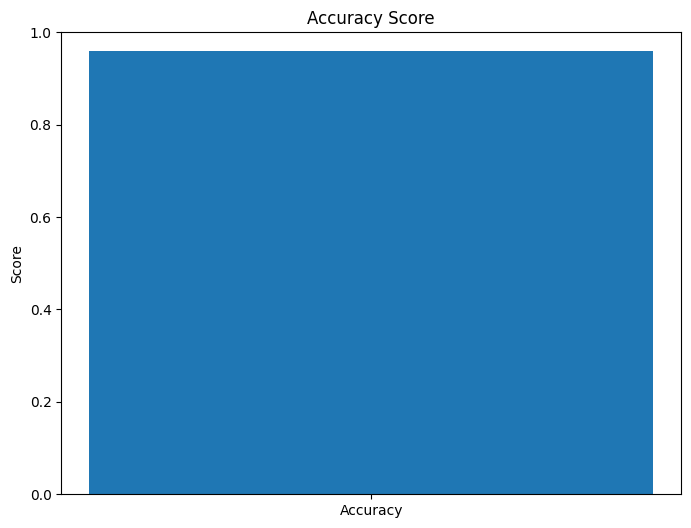

In [22]:
# Плотим accuracy score
plt.figure(figsize=(8, 6))
plt.bar(['Accuracy'], [accuracy])
plt.ylim(0, 1)
plt.title('Accuracy Score')
plt.ylabel('Score')
plt.show()


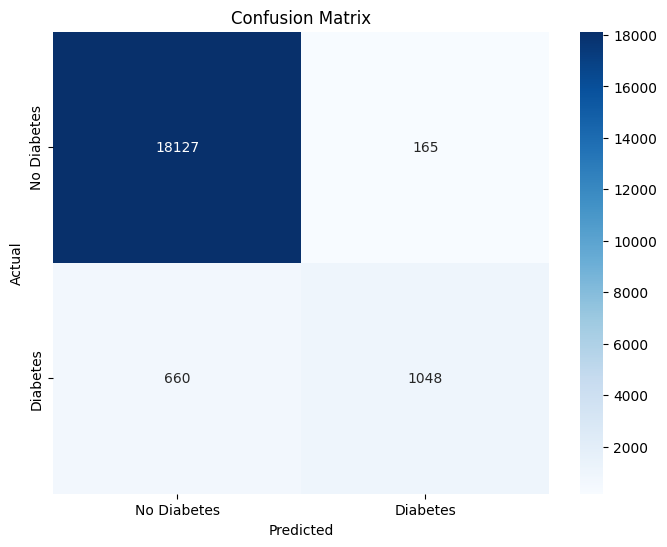

In [23]:

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


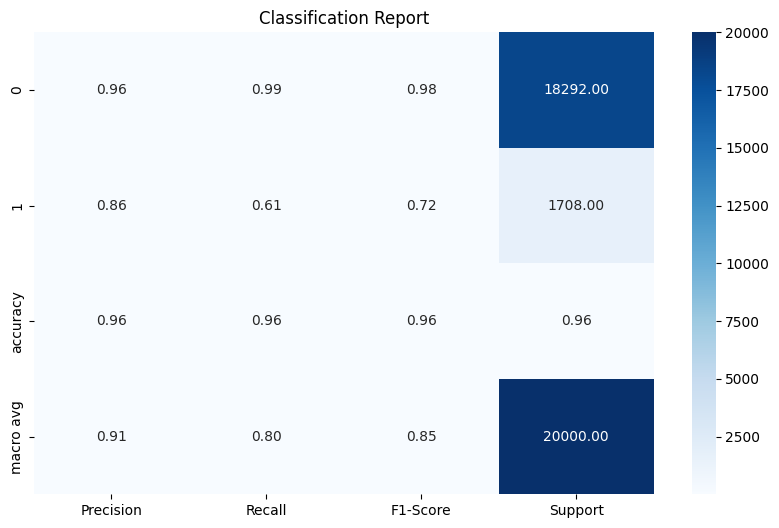

In [24]:
report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap='Blues', fmt='.2f',
            xticklabels=['Precision', 'Recall', 'F1-Score', 'Support'])
plt.title('Classification Report')
plt.show()


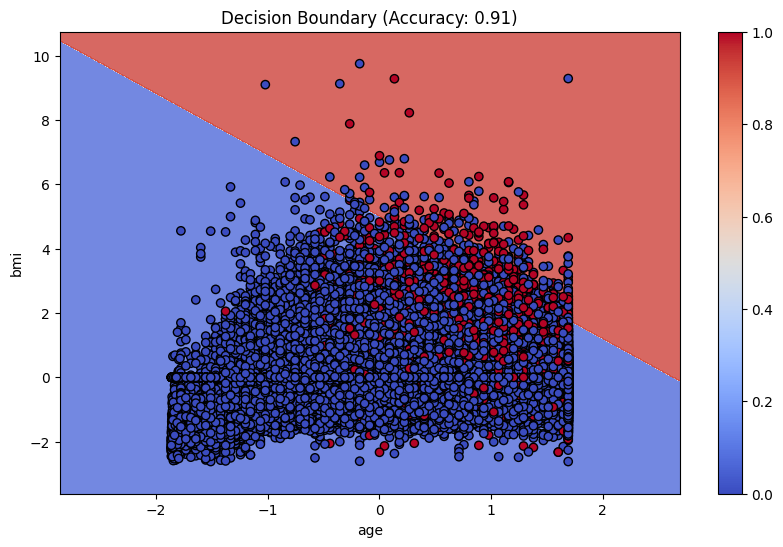

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
features = ['age', 'bmi']
X = df_encoded[features]
y = df_encoded['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolors='k', marker='o', cmap='coolwarm')
plt.title(f'Decision Boundary (Accuracy: {accuracy:.2f})')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.colorbar()
plt.show()